In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('Used_Bikes.csv')

In [3]:
df.shape

(32648, 8)

In [4]:
df.head()

,bike_name,city,kms_driven,owner,age,power,brand,price
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654,First Owner,3,110,TVS,420.0
1,Royal Enfield Classic 350cc,Delhi,11000,First Owner,4,350,Royal Enfield,1438.8
2,Triumph Daytona 675R,Delhi,110,First Owner,8,675,Triumph,7200.0
3,TVS Apache RTR 180cc,Bangalore,16329,First Owner,4,180,TVS,780.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000,First Owner,3,150,Yamaha,960.0


In [5]:
print(df['brand'].unique())
print(df['age'].unique())
print(df['power'].unique())
print(df['owner'].unique())

['TVS' 'Royal Enfield' 'Triumph' 'Yamaha' 'Honda' 'Hero' 'Bajaj' 'Suzuki'
 'Benelli' 'KTM' 'Mahindra' 'Kawasaki' 'Ducati' 'Hyosung'
 'Harley-Davidson' 'Jawa' 'BMW' 'Indian' 'Rajdoot' 'LML' 'Yezdi' 'MV'
 'Ideal']
[ 3  4  8  6  7  5  2 16 13  9 10 14 12 11  1 15 39 17 18 30 19 23 41 27
 37 24 20 43 38 63 34 31 22 26 25]
[ 110  350  675  180  150  160  100  500  250  200  125  302  220  390
  600  900  650  223  410  135 1100  765  300 1299  750  400 1300  821
 1198  883  959  295  320  310  899 1800  535 1130 1000 1200 1050  800
 1262 1700  175  865  797  796  149  850 1090  502  107]
['First Owner' 'Second Owner' 'Third Owner' 'Fourth Owner Or More']


In [6]:
##check missing values
df.isnull().sum()

bike_name     0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
price         0
dtype: int64

In [7]:
df.describe()

,kms_driven,age,power,price
count,32648.000000,32648.000000,32648.000000,32648.000000
mean,26344.625184,8.048211,213.511302,819.545012
std,22208.527695,4.031700,134.428868,1088.623142
min,1.000000,1.000000,100.000000,52.800000
25%,12000.000000,5.000000,150.000000,300.000000
50%,20373.000000,7.000000,150.000000,516.000000
75%,35000.000000,10.000000,220.000000,960.000000
max,750000.000000,63.000000,1800.000000,22800.000000


In [8]:
df.head()

,bike_name,city,kms_driven,owner,age,power,brand,price
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654,First Owner,3,110,TVS,420.0
1,Royal Enfield Classic 350cc,Delhi,11000,First Owner,4,350,Royal Enfield,1438.8
2,Triumph Daytona 675R,Delhi,110,First Owner,8,675,Triumph,7200.0
3,TVS Apache RTR 180cc,Bangalore,16329,First Owner,4,180,TVS,780.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000,First Owner,3,150,Yamaha,960.0


In [9]:
df=df[['price','kms_driven','owner','age','power','brand']]

In [10]:
df.head()

,price,kms_driven,owner,age,power,brand
0,420.0,17654,First Owner,3,110,TVS
1,1438.8,11000,First Owner,4,350,Royal Enfield
2,7200.0,110,First Owner,8,675,Triumph
3,780.0,16329,First Owner,4,180,TVS
4,960.0,10000,First Owner,3,150,Yamaha


In [11]:
df.describe()

,price,kms_driven,age,power
count,32648.000000,32648.000000,32648.000000,32648.000000
mean,819.545012,26344.625184,8.048211,213.511302
std,1088.623142,22208.527695,4.031700,134.428868
min,52.800000,1.000000,1.000000,100.000000
25%,300.000000,12000.000000,5.000000,150.000000
50%,516.000000,20373.000000,7.000000,150.000000
75%,960.000000,35000.000000,10.000000,220.000000
max,22800.000000,750000.000000,63.000000,1800.000000


In [12]:
df.shape

(32648, 6)

In [13]:
#df=pd.get_dummies(df,drop_first=True)
from sklearn.preprocessing import LabelEncoder

In [14]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [15]:
le_brand = LabelEncoder()
df['brand'] = le_brand.fit_transform(df['brand'])
df["brand"].unique()

array([19, 17, 20, 21,  6,  5,  1, 18,  2, 11, 15, 12,  3,  7,  4, 10,  0,
        9, 16, 13, 22, 14,  8])

In [16]:
le_owner = LabelEncoder()
df['owner'] = le_owner.fit_transform(df['owner'])
df["owner"].unique()

array([0, 2, 3, 1])

In [17]:
df.head()

,price,kms_driven,owner,age,power,brand
0,420.0,17654,0,3,110,19
1,1438.8,11000,0,4,350,17
2,7200.0,110,0,8,675,20
3,780.0,16329,0,4,180,19
4,960.0,10000,0,3,150,21


In [18]:
df.to_csv('testdata.csv')

In [19]:
df.head()

,price,kms_driven,owner,age,power,brand
0,420.0,17654,0,3,110,19
1,1438.8,11000,0,4,350,17
2,7200.0,110,0,8,675,20
3,780.0,16329,0,4,180,19
4,960.0,10000,0,3,150,21


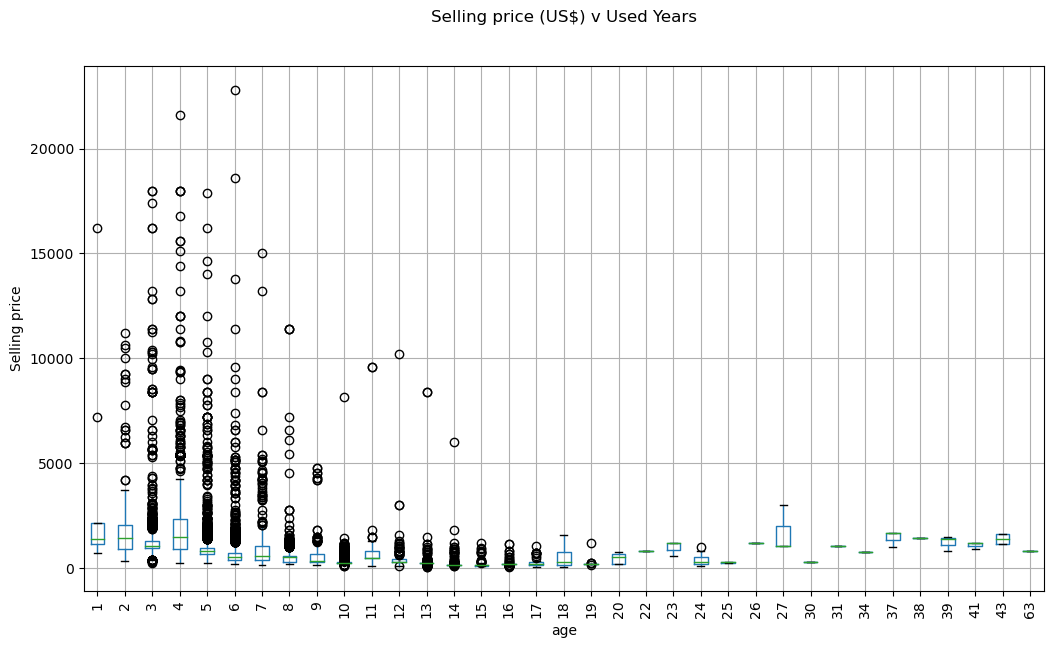

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('price', 'age', ax=ax)
plt.suptitle('Selling price (US$) v Used Years')
plt.title('')
plt.ylabel('Selling price')
plt.xticks(rotation=90)
plt.show()

In [21]:
# now the data is ready 
# so spltting the data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop("price", axis=1)
y = df["price"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2 )

In [25]:
len(X_train)

26118

In [26]:
len(X_test)

6530

In [27]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import numpy as np

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = linear_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("linear regression error margin:")
print('R2 score',r2_score(y_test,y_pred))
print("${:,.02f}".format(error))

linear regression error margin:
R2 score 0.7551859335725811
$536.67


In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [33]:
y_pred = dec_tree_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print('R2 score',r2_score(y_test,y_pred))
print("Decision Tree error margin:")
print("${:,.02f}".format(error))

R2 score 0.9223172808482332
Decision Tree error margin:
$302.31


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [36]:
y_pred = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("RandomForestRegressor error margin:")
print('R2 score',r2_score(y_test,y_pred))
print("${:,.02f}".format(error))

RandomForestRegressor error margin:
R2 score 0.9549472758562889
$230.23


In [37]:
data = {"model": random_forest_reg, "le_brand": le_brand, "le_owner": le_owner}

In [38]:
with open('stored_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [39]:
df.head()

,price,kms_driven,owner,age,power,brand
0,420.0,17654,0,3,110,19
1,1438.8,11000,0,4,350,17
2,7200.0,110,0,8,675,20
3,780.0,16329,0,4,180,19
4,960.0,10000,0,3,150,21


In [40]:
X_test

,kms_driven,owner,age,power,brand
24830,18000,0,8,350,17
10313,14500,0,4,250,21
14759,8000,0,5,220,1
32284,20373,0,6,220,1
8076,500,0,4,220,1
...,...,...,...,...,...
31606,34968,0,14,150,5
9278,1700,0,3,200,1
7363,67731,0,10,100,5
8825,18832,0,4,350,17


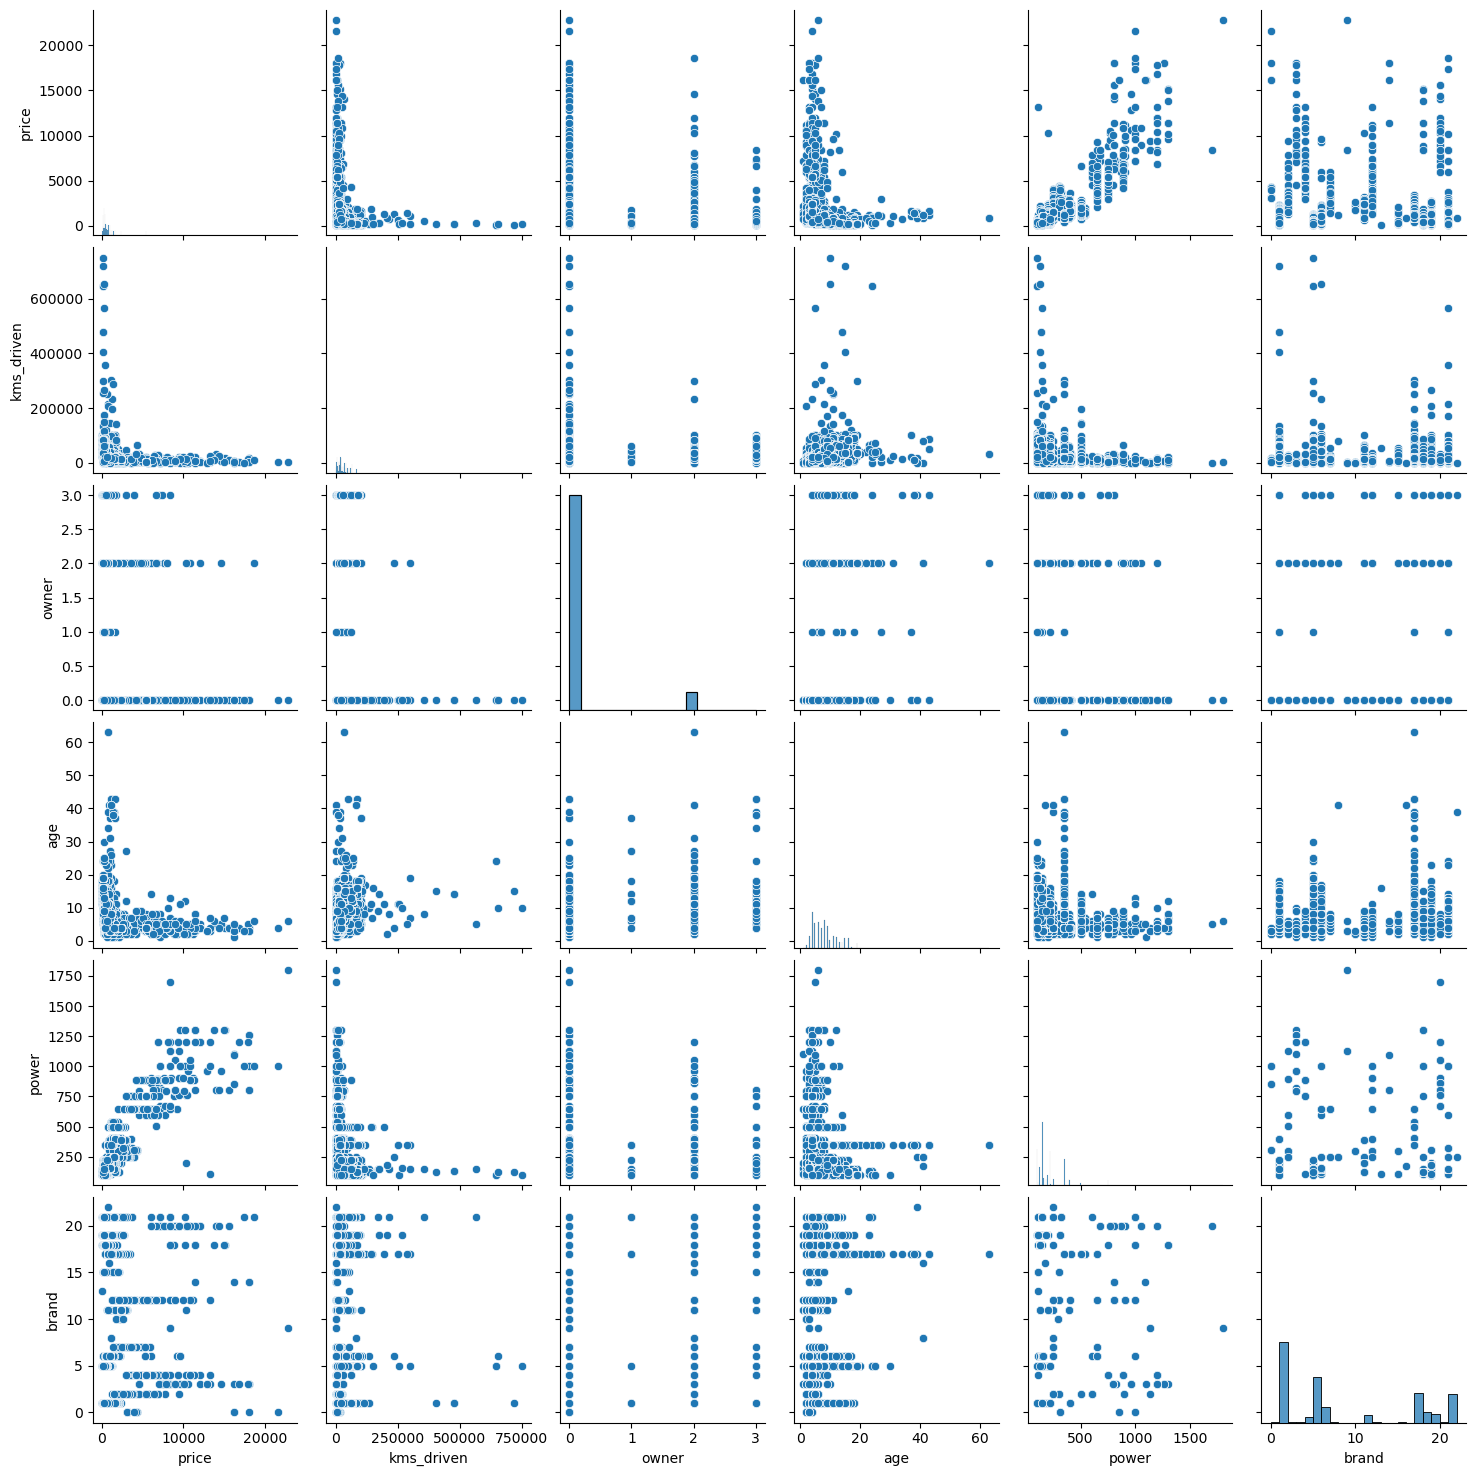

In [41]:
import seaborn as sns
sns.pairplot(df)

In [42]:
print(random_forest_reg.feature_importances_)

[0.02473423 0.00133836 0.04907804 0.88065984 0.04418953]


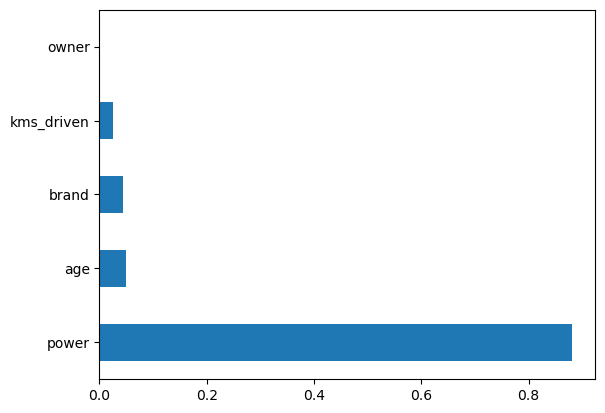

In [43]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(random_forest_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

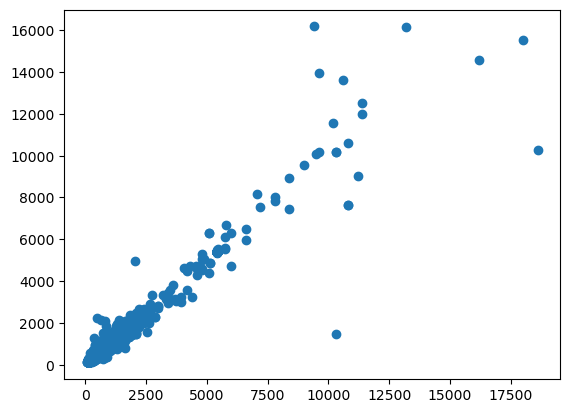

In [44]:
plt.scatter(y_test,y_pred)